In [1]:
# !wget --user YraZEdrHytaCSza --password BgZL3j8DT4 https://hmgubox2.helmholtz-muenchen.de/public.php/webdav/Acevedo_20.zip -O Acevedo_20.zip
# !wget --user YraZEdrHytaCSza --password BgZL3j8DT4 https://hmgubox2.helmholtz-muenchen.de/public.php/webdav/Matek_19.zip -O Matek_19.zip
# !wget --user YraZEdrHytaCSza --password BgZL3j8DT4 https://hmgubox2.helmholtz-muenchen.de/public.php/webdav/WBC1.zip -O WBC1.zip
# !wget --user YraZEdrHytaCSza --password BgZL3j8DT4 https://hmgubox2.helmholtz-muenchen.de/public.php/webdav/val_dummy.csv -O val_dummy.csv
# !wget --user YraZEdrHytaCSza --password BgZL3j8DT4 https://hmgubox2.helmholtz-muenchen.de/public.php/webdav/metadata2.csv -O metadata2.csv
# print('download complete')

In [1]:
# !wget --user xasgeXnwDD37wtM --password rrLcTxPfJm https://hmgubox2.helmholtz-muenchen.de/public.php/webdav/WBC2.zip -O WBC2.zip

/usr/bin/sh: wget: command not found


In [6]:
## unpack
# import shutil

# shutil.unpack_archive('Acevedo_20.zip', 'Datasets/Acevedo_20')
# shutil.unpack_archive('Matek_19.zip', 'Datasets/Matek_19')
# shutil.unpack_archive('WBC1.zip', 'Datasets/WBC1')
# !ls

In [1]:
# import os
# os.environ['KMP_WARNINGS'] = 'off'

In [1]:
import sys

In [3]:
# old_path = sys.path
# sys.path = [old_path[0]] + \
# [path for path in old_path[1:] if 'conda/envs' in path] + \
#             [path for path in old_path[1:] if 'conda/envs' not in path]

In [2]:
## instantiate the model
from torchvision.models import resnet18
model = resnet18(pretrained=True)
#!cp /p/home/jusers/lipaeva1/juwels/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth ./

In [4]:
## instantiate the model
#from torchvision.models import resnet50
#!cp resnet50* /p/home/jusers/lipaeva1/juwels/.cache/torch/hub/checkpoints/
#model = resnet50(pretrained=True)
#!cp /p/home/jusers/lipaeva1/juwels/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth ./

In [5]:
## install imagecodes
#!pip install --user imagecodecs

In [3]:
import os
from time import sleep
from glob import glob
import random
from tqdm import tqdm
import copy
import ntpath

import numpy as np
from imageio import imread
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, matthews_corrcoef, classification_report,confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score, f1_score,  precision_score, recall_score

import torch
import torch.nn as nn
import torch.optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
import torchvision.models as models
from torchvision.models import resnet18

In [4]:
import imagecodecs

In [7]:
# from stain_mixup.utils import get_stain_matrix
# from stain_mixup.augment import stain_mixup

In [5]:
data_path = {
        "Ace_20": "Datasets/Acevedo_20", # Acevedo_20 Dataset
        "Mat_19": "Datasets/Matek_19", # Matek_19 Dataset
        "WBC1": "Datasets/WBC1", # WBC1 dataset
        "WBC2": "Datasets/WBC2" # WBC2 dataset
    }

In [7]:
# Common classes of the datasets and their labels: 
# Highly underrepresented classes like atypical lymphocytes and smudge cells were left out.

label_map_all = {
        'basophil': 0,
        'eosinophil': 1,
        'erythroblast': 2,
        'myeloblast' : 3,
        'promyelocyte': 4,
        'myelocyte': 5,
        'metamyelocyte': 6,
        'neutrophil_banded': 7,
        'neutrophil_segmented': 8,
        'monocyte': 9,
        'lymphocyte_typical': 10
    }

label_map_reverse = {
        0: 'basophil',
        1: 'eosinophil',
        2: 'erythroblast',
        3: 'myeloblast',
        4: 'promyelocyte',
        5: 'myelocyte',
        6: 'metamyelocyte',
        7: 'neutrophil_banded',
        8: 'neutrophil_segmented',
        9: 'monocyte',
        10: 'lymphocyte_typical'
    }

# The unlabeled WBC dataset gets the classname 'Data-Val' for every image

# label_map_pred = {
#         'DATA-VAL': 0
#     }

label_map_pred = {
        'DATA-TEST': 0
    }

In [10]:
## Data loading
savepath='metadata.csv' # path where the created dataframe will be stored

def finding_classes(data_dir):
    """
    this function finds the folders in the root path and considers them
    as classes
    """
    classes = [folder for folder in sorted(os.listdir(data_dir)) if not folder.startswith('.') and not folder.startswith('_')]
    return classes


def metadata_generator(data_path):
    #this function generates a pandas dataframe containing image information (paths, labels, dataset)
    metadata = pd.DataFrame(columns=["Image", "file", "label", "dataset", "set"])
    for ds in data_path:
        list_of_classes = finding_classes(data_path[ds])
        for cl in list_of_classes:
            metadata_dummy = pd.DataFrame(columns=["Image", "file", "label", "dataset", "set", 'mean1', 'mean2', 'mean3'])
            metadata_dummy["Image"] = None
            metadata_dummy["file"] = sorted(glob(os.path.join(data_path[ds], cl, "*")))
            metadata_dummy["label"] = cl
            metadata_dummy["dataset"] = ds
            metadata_dummy["set"] = "train"
            for i in range(len(metadata_dummy)):
                metadata_dummy['Image'].loc[i]=ntpath.basename(metadata_dummy['file'][i])
            metadata = metadata.append(metadata_dummy, ignore_index=True)
            metadata_dummy = None
            
    return metadata

metadata = metadata_generator(data_path)

print(metadata)

/tmp/ipykernel_30954/1245129583.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(metadata_dummy, ignore_index=True)
/tmp/ipykernel_30954/1245129583.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(metadata_dummy, ignore_index=True)
/tmp/ipykernel_30954/1245129583.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(metadata_dummy, ignore_index=True)
/tmp/ipykernel_30954/1245129583.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(metadata_dummy, ignore_index=True)
/tmp/ipykernel_30954/1245129583.py:27: FutureWarning: Th

               Image                                        file      label  \
0      BA_100102.jpg  Datasets/Acevedo_20/basophil/BA_100102.jpg   basophil   
1      BA_101381.jpg  Datasets/Acevedo_20/basophil/BA_101381.jpg   basophil   
2      BA_101611.jpg  Datasets/Acevedo_20/basophil/BA_101611.jpg   basophil   
3      BA_102039.jpg  Datasets/Acevedo_20/basophil/BA_102039.jpg   basophil   
4      BA_102750.jpg  Datasets/Acevedo_20/basophil/BA_102750.jpg   basophil   
...              ...                                         ...        ...   
35784        994.TIF             Datasets/WBC2/DATA-TEST/994.TIF  DATA-TEST   
35785        995.TIF             Datasets/WBC2/DATA-TEST/995.TIF  DATA-TEST   
35786        996.TIF             Datasets/WBC2/DATA-TEST/996.TIF  DATA-TEST   
35787        997.TIF             Datasets/WBC2/DATA-TEST/997.TIF  DATA-TEST   
35788        999.TIF             Datasets/WBC2/DATA-TEST/999.TIF  DATA-TEST   

      dataset    set mean1 mean2 mean3  
0      Ace

/tmp/ipykernel_30954/1245129583.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append(metadata_dummy, ignore_index=True)


In [8]:
### I removed initial photos (after brightness adjusting) -> need to load metadata from the file

metadata = pd.read_csv('metadata.csv')


In [ ]:
# # this function computes the rgb mean values for all images in the the dataframe
# def compute_mean(dataframe=metadata, savepath=savepath, selected_channels=[0,1,2]):
#     for idx in tqdm(range(len(dataframe)), position=0, leave=True):
#         h5_file_path = dataframe.loc[idx,"file"]
#         try:
#             image= imread(h5_file_path)[:,:,selected_channels]
#         except ValueError: 
#             print(h5_file_path)
#             break
#         #image = rgb2hsv(image)
#         dataframe.loc[idx, 'mean1']= np.mean(image[:,:,0])
#         dataframe.loc[idx, 'mean2']= np.mean(image[:,:,1])
#         dataframe.loc[idx, 'mean3']= np.mean(image[:,:,2])
#     dataframe.to_csv(savepath, index=False)
#     print(f'The dataframe was saved to {savepath}')
#     print(dataframe)
#     return dataframe

# compute_mean()

  0%|          | 0/35789 [00:00<?, ?it/s]/tmp/ipykernel_30954/1980869978.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image= imread(h5_file_path)[:,:,selected_channels]
 60%|█████▉    | 21379/35789 [04:47<05:59, 40.06it/s] 

In [9]:
## to add info about the mean values of rgb
metadata2_path = "metadata2.csv"
metadata2 = pd.read_csv(metadata2_path)
print(metadata2)

               Image       mean1       mean2       mean3
0      BA_100102.jpg  224.147949  192.992011  181.520684
1      BA_101381.jpg  216.880395  185.347467  180.204591
2      BA_101611.jpg  218.369314  182.833150  181.483938
3      BA_102039.jpg  212.396771  178.227456  180.590029
4      BA_102750.jpg  226.372008  194.938170  184.035889
...              ...         ...         ...         ...
34198        995.TIF  158.898088  140.900053  180.112944
34199        996.TIF  144.568094  113.955319  166.413966
34200        997.TIF  170.265685  145.219063  188.039786
34201        998.TIF  180.459660  147.819746  188.145870
34202        999.TIF  190.106132  173.115584  202.055411

[34203 rows x 4 columns]


In [10]:
check_data1=metadata.drop(columns=['file', 'label', 'dataset', 'set', 'mean1', 'mean2', 'mean3'])
check_data2=metadata2.drop(columns=['mean1', 'mean2', 'mean3'])
if check_data1.equals(check_data2):
    metadata['mean1']=metadata2['mean1']
    metadata['mean2']=metadata2['mean2']
    metadata['mean3']=metadata2['mean3']
    metadata.to_csv(savepath, index=False)
    print('Worked! The rgb mean values were added')
    print(f'The dataframe was saved to {savepath}')
    print(metadata)
else:
    print('Files are not matching. Make sure you did not change the order or use option 2')

Worked! The rgb mean values were added
The dataframe was saved to metadata.csv
               Image                                        file     label  \
0      BA_100102.jpg  Datasets/Acevedo_20/basophil/BA_100102.jpg  basophil   
1      BA_101381.jpg  Datasets/Acevedo_20/basophil/BA_101381.jpg  basophil   
2      BA_101611.jpg  Datasets/Acevedo_20/basophil/BA_101611.jpg  basophil   
3      BA_102039.jpg  Datasets/Acevedo_20/basophil/BA_102039.jpg  basophil   
4      BA_102750.jpg  Datasets/Acevedo_20/basophil/BA_102750.jpg  basophil   
...              ...                                         ...       ...   
34198        995.TIF              Datasets/WBC1/DATA-VAL/995.TIF  DATA-VAL   
34199        996.TIF              Datasets/WBC1/DATA-VAL/996.TIF  DATA-VAL   
34200        997.TIF              Datasets/WBC1/DATA-VAL/997.TIF  DATA-VAL   
34201        998.TIF              Datasets/WBC1/DATA-VAL/998.TIF  DATA-VAL   
34202        999.TIF              Datasets/WBC1/DATA-VAL/999.TI

In [9]:
### Change filepath in metadata
if 'old_file' not in metadata.columns:
    print('Add column old file')
    metadata['old_file'] = metadata.file


Add column old file


In [10]:
# for the preprocessed images (stain_mixup)
for i, file in enumerate(metadata.old_file):
    file = file.split('/')
    new_file = '/p/project/hai_ds_isa/lipaeva1/mixup_datasets/' + file[1] + '/' + file[2] + '/' + file[3]
    if new_file.endswith('.TIF'):
        new_file = new_file.rsplit('.', 1)[0] + '.tiff'
    metadata.file[i] = new_file

/tmp/ipykernel_7113/1492554819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata.file[i] = new_file


In [13]:
# for i, file in enumerate(metadata.old_file):
#     file = file.split('/')
#     new_file = 'bright_datasets/' + file[1] + '/' + file[3] 
#     if new_file.endswith('.TIF'):
#         new_file = new_file.rsplit('.', 1)[0] + '.tiff'
#     metadata.file[i] = new_file

In [11]:
#metadata = pd.read_csv(savepath)
print(metadata)

               Image                                               file  \
0      BA_100102.jpg  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
1      BA_101381.jpg  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
2      BA_101611.jpg  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
3      BA_102039.jpg  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
4      BA_102750.jpg  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
...              ...                                                ...   
35784        994.TIF  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
35785        995.TIF  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
35786        996.TIF  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
35787        997.TIF  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   
35788        999.TIF  /p/project/hai_ds_isa/lipaeva1/mixup_datasets/...   

           label dataset    set       mean1       mean2       mean3  \
0       basophil  Ace_20  tr

In [13]:
metadata.file[35199]

'/p/project/hai_ds_isa/lipaeva1/mixup_datasets/WBC2/DATA-TEST/447.tiff'

In [18]:
### Data visualization

In [14]:
ace_metadata=metadata.loc[metadata['dataset']=='Ace_20'].reset_index(drop = True)
mat_metadata=metadata.loc[metadata['dataset']=='Mat_19'].reset_index(drop = True)
#wbc_metadata=metadata.loc[metadata['dataset']=='WBC1'].reset_index(drop = True)
wbc_metadata=metadata.loc[metadata['dataset']=='WBC2'].reset_index(drop = True)

In [15]:
#this function shows a random sample of the dataset
def data_sample(dataframe=metadata):
    n=random.randint(0, len(dataframe)-1)
    image = mpimg.imread(dataframe.file[n])
    plt.title(f'label: {dataframe.label[n]}')
    plt.imshow(image)
    
    return image

In [16]:
#this function shows information about the datasets classes and rgb means
def data_report(dataframe=metadata, label=None, color1='lightblue', color2='darkblue'):

    print('\033[1m' + 'label \t \t \timages'+ '\033[0m')
    print('')
    print(f'total \t \t \t{len(dataframe)}')
    print(dataframe.label.value_counts())
 
    x1=np.array(dataframe['mean1'])
    x2=np.array(dataframe['mean2'])
    x3=np.array(dataframe['mean3'])
    mean1=np.mean(np.array(dataframe['mean1']))
    mean2=np.mean(np.array(dataframe['mean2']))
    mean3=np.mean(np.array(dataframe['mean3']))
    std1=np.std(np.array(dataframe['mean1']))
    std2=np.std(np.array(dataframe['mean2']))
    std3=np.std(np.array(dataframe['mean3']))
    print('\033[1m' + 'mean \t \tstd'+ '\033[0m')
    print(f'red: {np.round_(mean1, decimals=2)} \tred: {np.round_(std1, decimals=2)}')
    print(f'green: {np.round_(mean2, decimals=2)} \tgreen: {np.round_(std2, decimals=2)}')
    print(f'blue: {np.round_(mean3, decimals=2)} \tblue: {np.round_(std3, decimals=2)}')
    print('')


#this function plots the data
def data_plot(dataframes=[ace_metadata, mat_metadata, wbc_metadata],
                labels=['Ace_20', 'Mat_19', 'WBC1'],
                colors1=['lightblue', 'orange', 'greenyellow'],
                colors2=['darkblue', 'red', 'limegreen'],
                save_name='plot_all'):

    f, axarr = plt.subplots(1,3, figsize=(15,5))
    df=0
    while df<len(dataframes):
        
        dataframe = dataframes[df]
        label=labels[df]
        color1=colors1[df]
        color2=colors2[df]

        x1=np.array(dataframe['mean1'])
        x2=np.array(dataframe['mean2'])
        x3=np.array(dataframe['mean3'])
        mean1=np.mean(np.array(dataframe['mean1']))
        mean2=np.mean(np.array(dataframe['mean2']))
        mean3=np.mean(np.array(dataframe['mean3']))
        std1=np.std(np.array(dataframe['mean1']))
        std2=np.std(np.array(dataframe['mean2']))
        std3=np.std(np.array(dataframe['mean3']))
        
        # red vs green
        
        axarr[0].set_xlabel("red")
        axarr[0].set_ylabel("green")

        a=np.array((x1,x2)).T

        axarr[0].scatter(a[:, 0], a[:, 1], s=3, color=color1, alpha=1)
        axarr[0].scatter(x=mean1, y=mean2, s=1, color=color2)
        axarr[0].plot([mean1-std1, mean1+std1],[mean2, mean2], color=color2, label=label)
        axarr[0].plot([mean1, mean1],[mean2-std2, mean2+std2], color=color2)


        # red vs blue

        axarr[1].set_xlabel("red")
        axarr[1].set_ylabel("blue")

        b=np.array((x1,x3)).T

        axarr[1].scatter(b[:, 0], b[:, 1], s=3, color=color1, alpha=1)
        axarr[1].scatter(x=mean1, y=mean3, s=1, color=color2)
        axarr[1].plot([mean1-std1, mean1+std1],[mean3, mean3], color=color2, label=label)
        axarr[1].plot([mean1, mean1],[mean3-std3, mean3+std3], color=color2)


        # green vs blue

        axarr[2].set_xlabel("green")
        axarr[2].set_ylabel("blue")

        b=np.array((x2,x3)).T

        axarr[2].scatter(b[:, 0], b[:, 1], s=3, color=color1, alpha=1)
        axarr[2].scatter(x=mean1, y=mean3, s=1, color=color2)
        axarr[2].plot([mean2-std2, mean2+std2],[mean3, mean3], color=color2, label=label)
        axarr[2].plot([mean2, mean2],[mean3-std3, mean3+std3], color=color2)

        plt.legend()

        f.tight_layout()

        df+=1
        
    plt.savefig(save_name)

In [17]:
### Acevedo

In [18]:
label_list_pbc = [
        'basophil',
        'eosinophil',
        'erythroblast',
        'promyelocyte',
        'myelocyte',
        'metamyelocyte',
        'neutrophil_banded',
        'neutrophil_segmented',
        'monocyte',
        'lymphocyte_typical',
]

label 	 	 	images

total 	 	 	14291
eosinophil              3067
neutrophil_segmented    1646
neutrophil_banded       1633
erythroblast            1499
monocyte                1370
basophil                1168
lymphocyte_typical      1164
myelocyte               1137
metamyelocyte           1015
promyelocyte             592
Name: label, dtype: int64
mean 	 	std
red: 221.63 	red: 6.9
green: 189.09 	green: 7.86
blue: 182.59 	blue: 3.56



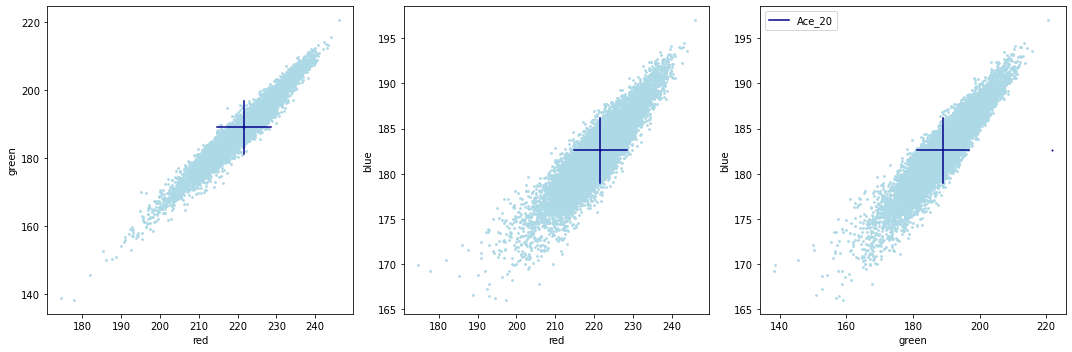

In [19]:
data_report(ace_metadata)
ace_plot=data_plot([ace_metadata], labels=['Ace_20'], save_name='plot_ace')

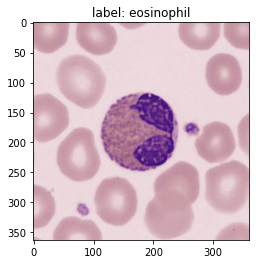

In [20]:
ace_image=data_sample(ace_metadata)

In [21]:
### Matek

In [22]:
label_list_all = [
        'basophil',
        'eosinophil',
        'erythroblast',
        'myeloblast',
        'promyelocyte',
        'myelocyte',
        'metamyelocyte',
        'neutrophil_banded',
        'neutrophil_segmented',
        'monocyte',
        'lymphocyte_typical'
]

label 	 	 	images

total 	 	 	18321
neutrophil_segmented    8484
lymphocyte_typical      3937
myeloblast              3268
monocyte                1815
eosinophil               424
neutrophil_banded        109
basophil                  79
erythroblast              78
promyelocyte              70
myelocyte                 42
metamyelocyte             15
Name: label, dtype: int64
mean 	 	std
red: 209.33 	red: 11.69
green: 185.69 	green: 14.45
blue: 213.28 	blue: 10.35



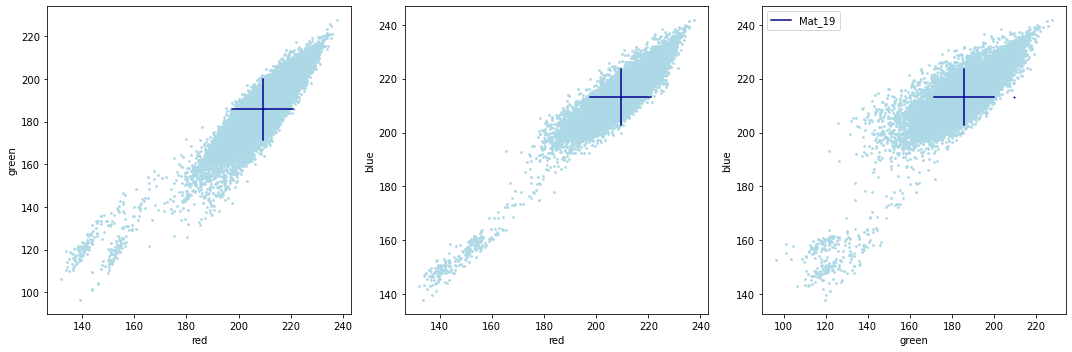

In [23]:
data_report(mat_metadata)
mat_plot=data_plot([mat_metadata], labels=['Mat_19'], save_name='plot_mat')

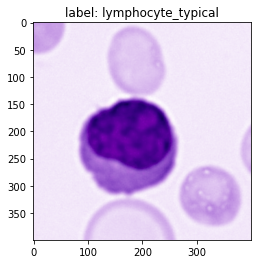

In [24]:
mat_image=data_sample(mat_metadata)

In [25]:
### WBC

label 	 	 	images

total 	 	 	1586
DATA-TEST    1586
Name: label, dtype: int64
mean 	 	std
red: 188.53 	red: 21.15
green: 165.83 	green: 24.3
blue: 198.3 	blue: 18.09



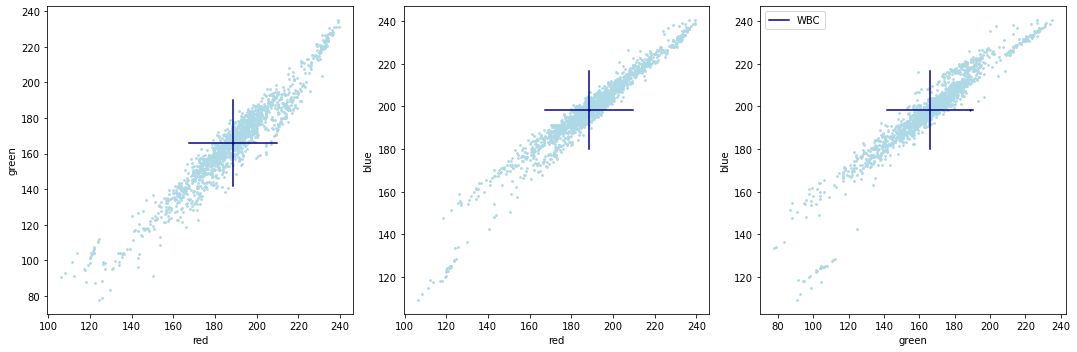

In [26]:
data_report(wbc_metadata)
wbc_plot=data_plot([wbc_metadata], labels=['WBC'], save_name='plot_wbc')

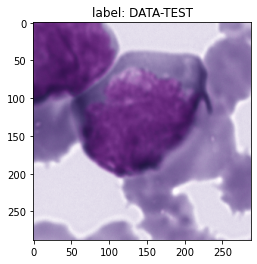

In [27]:
wbc_image=data_sample(wbc_metadata)

In [24]:
### Comparison of datasets 

label 	 	 	images

total 	 	 	35789
neutrophil_segmented    10130
lymphocyte_typical       5101
eosinophil               3491
myeloblast               3268
monocyte                 3185
neutrophil_banded        1742
DATA-VAL                 1591
DATA-TEST                1586
erythroblast             1577
basophil                 1247
myelocyte                1179
metamyelocyte            1030
promyelocyte              662
Name: label, dtype: int64
mean 	 	std
red: 212.41 	red: 14.76
green: 185.31 	green: 14.94
blue: 199.71 	blue: 17.32



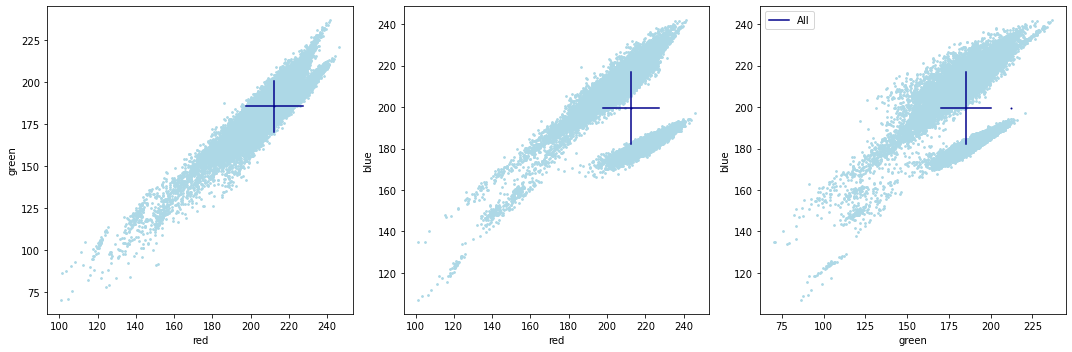

In [28]:
data_report()
all_plot1=data_plot([metadata], labels=['All'], save_name='plot_all1')

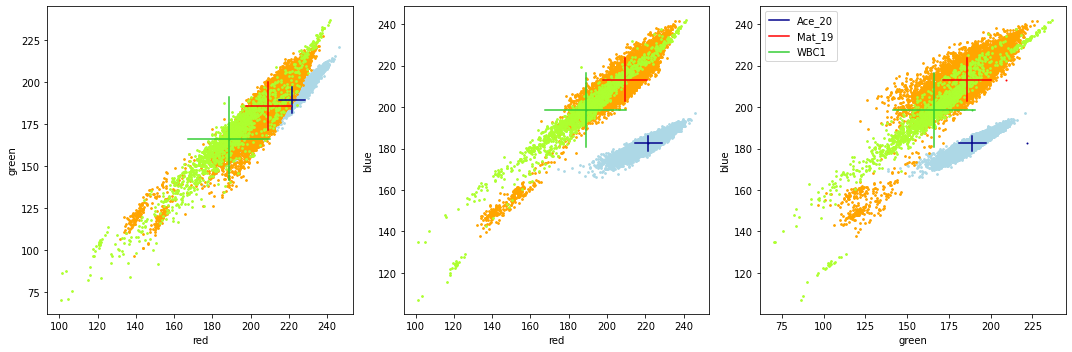

In [26]:
all_plot2=data_plot(save_name='plot_all2')

In [27]:
### Adjust all pictures to 25x25 micrometers

In [29]:
crop_Ace20=250
crop_Mat19=345
crop_WBC1=288
crop_WBC2=288

dataset_image_size = {
    "Ace_20":crop_Ace20,   #250,
    "Mat_19":crop_Mat19,   #345, 
    "WBC1":crop_WBC1,   #288,  
}

dataset_image_size = {
    "Ace_20":crop_Ace20,   #250,
    "Mat_19":crop_Mat19,   #345, 
    "WBC2":crop_WBC2,   #288,  
}

In [30]:
def crop(image, crop_size):
    h1 = (image.shape[0] - crop_size) /2
    h1 = int(h1)
    h2 = (image.shape[0] + crop_size) /2
    h2 = int(h2)

    w1 = (image.shape[1] - crop_size) /2
    w1 = int(w1)
    w2 = (image.shape[1] + crop_size) /2
    w2 = int(w2)
    cropped_image = image[h1:h2,w1:w2, :]
    return cropped_image

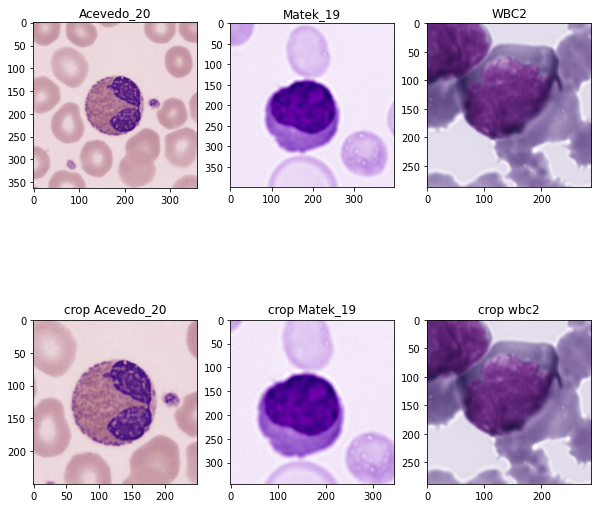

In [31]:
f, axarr = plt.subplots(2,3, figsize=(10,10))

axarr[0,0].set_title('Acevedo_20')
axarr[0,0].imshow(ace_image)
axarr[0,1].set_title('Matek_19')
axarr[0,1].imshow(mat_image)
axarr[0,2].set_title('WBC2')
axarr[0,2].imshow(wbc_image)


axarr[1,0].set_title('crop Acevedo_20')
axarr[1,0].imshow(crop(ace_image, crop_Ace20))
axarr[1,1].set_title('crop Matek_19')
axarr[1,1].imshow(crop(mat_image, crop_Mat19))
axarr[1,2].set_title('crop wbc2')
axarr[1,2].imshow(crop(wbc_image, crop_WBC2))

In [32]:
import torchvision.transforms.functional as F

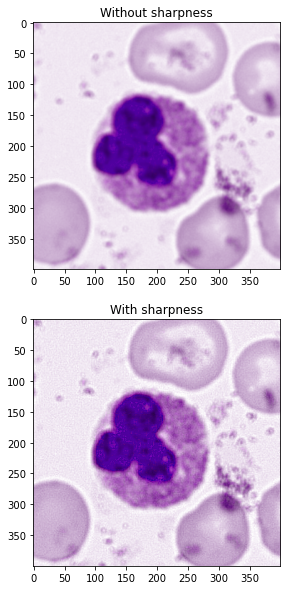

In [33]:
### Testing data transformation
# play around with transormation technics

ace_image = mpimg.imread(metadata[metadata.Image == 'EOS_0356.tiff'].file.iloc[0])[:, :, [0, 1, 2]]
# ace_image = data_sample(metadata[(metadata.Image == 'LYT_3893.tiff') | (metadata.Image == 'LYT_3888.tiff')])

# ace_image1 = ace_image.transpose((2, 0, 1))
ace_image1 = transforms.ToTensor()(ace_image) # torch.from_numpy(ace_image / 255.0)
ace_image2 = F.adjust_sharpness(ace_image1, 7.0)

f, axarr = plt.subplots(2, figsize=(10,10))
axarr[0].set_title('Without sharpness')
axarr[0].imshow(ace_image1.permute(1, 2, 0))
axarr[1].set_title('With sharpness')
axarr[1].imshow(ace_image2.permute(1, 2, 0))

In [33]:
### Solution

In [34]:
example_metadata=metadata
source_domains=['Ace_20', 'Mat_19']
source_index = example_metadata.dataset.isin(source_domains)
example_metadata = example_metadata.loc[source_index,:].copy().reset_index(drop = True)
# example_matadata contains only data with known classification 

In [35]:
print('\033[1m' + 'label \t \t \timages'+ '\033[0m')
print('')
print(f'total \t \t \t{len(example_metadata)}')
print(example_metadata.label.value_counts())
## It is a lot of neutrophil_segmented and lymphocyte_typical -> Watch out!

label 	 	 	images

total 	 	 	32612
neutrophil_segmented    10130
lymphocyte_typical       5101
eosinophil               3491
myeloblast               3268
monocyte                 3185
neutrophil_banded        1742
erythroblast             1577
basophil                 1247
myelocyte                1179
metamyelocyte            1030
promyelocyte              662
Name: label, dtype: int64


In [36]:
## Calculate weights based on the biological distributions of cells from Matek dataset
class_counts = np.bincount(mat_metadata.label.map(label_map_all)).astype(float)
class_weights = np.sum(class_counts) / class_counts
class_weights /= np.sum(class_weights)
class_weights = np.sqrt(class_weights)
class_weights /= np.sum(class_weights)
class_weights

array([0.11600422, 0.05007309, 0.11674547, 0.01803625, 0.12323621,
       0.15909726, 0.26622063, 0.09875841, 0.01119404, 0.02420188,
       0.01643254])

In [250]:
## Calculate weights based on the biological distributions of cells from Matek dataset
class_counts = np.bincount(mat_metadata.label.map(label_map_all)).astype(float)
class_weights = np.sum(class_counts) / class_counts
class_weights /= np.sum(class_weights)
class_weights = np.power(class_weights, 0.1)
class_weights /= np.min(class_weights)
class_weights

array([1.59623694, 1.34934648, 1.59827169, 1.10009923, 1.61566108,
       1.70033752, 1.8847378 , 1.54567227, 1.        , 1.16673548,
       1.0798005 ])

In [251]:
## Calculate weights based on the biological distributions of cells from both dataset
class_counts = np.bincount(example_metadata.label.map(label_map_all)).astype(float)
class_weights = np.sum(class_counts) / class_counts
class_weights /= np.sum(class_weights)
class_weights = np.power(class_weights, 0.25)
class_weights /= np.min(class_weights)
class_weights

array([1.68824607, 1.30516344, 1.59200504, 1.32688062, 1.97782501,
       1.71207943, 1.77089599, 1.55288868, 1.        , 1.33544191,
       1.18710335])

In [252]:
## Split the data on the training, validation, and test

In [36]:
test_fraction=0.2 #of the whole dataset
val_fraction=0.125 #of 0.8 of the dataset (corresponds to 0.1 of the whole set)

In [37]:
# first of all, split data from the example_metadata on train and test
train_index, test_index, train_label, test_label = train_test_split(
    example_metadata.index,
    example_metadata.label + "_" + example_metadata.dataset,
    test_size=test_fraction,
    random_state=0, 
    shuffle=True,
    stratify=example_metadata.label
    )
example_metadata.loc[test_index, 'set']='test'
train_val_metadata=example_metadata.loc[train_index]

In [38]:
# second, split train data (obtain from the previous cell) on train and validation data
train_index, val_index, train_label, val_label = train_test_split(
    train_val_metadata.index,
    train_val_metadata.label + "_" + train_val_metadata.dataset,
    test_size=val_fraction,
    random_state=0, 
    shuffle=True, 
    stratify=train_val_metadata.label
    )
example_metadata.loc[val_index, 'set']='val'

In [39]:
train_size=len(example_metadata.loc[example_metadata['set'] == 'train'])
val_size=len(example_metadata.loc[example_metadata['set'] == 'val'])
test_size=len(example_metadata.loc[example_metadata['set'] == 'test'])

print('\033[1m' + 'complete dataset'+ '\033[0m')
print('\033[1m' + 'label \t \t \timages'+ '\033[0m')
print('')
print(f'total \t \t \t{len(example_metadata)}')
print(example_metadata.label.value_counts())
print('')
print('\033[1m' + 'trainset'+ '\033[0m')
print('\033[1m' + 'label \t \t \timages'+ '\033[0m')
print('')
print(f'total \t \t \t{train_size}')
print(example_metadata.loc[example_metadata['set'] == 'train'].label.value_counts())
print('')
print('\033[1m' + 'validationset'+ '\033[0m')
print('\033[1m' + 'label \t \t \timages'+ '\033[0m')
print('')
print(f'total \t \t \t{val_size}')
print(example_metadata.loc[example_metadata['set'] == 'val'].label.value_counts())
print('')
print('\033[1m' + 'testset'+ '\033[0m')
print('\033[1m' + 'label \t \t \timages'+ '\033[0m')
print('')
print(f'total \t \t \t{test_size}')
print(example_metadata.loc[example_metadata['set'] == 'test'].label.value_counts())

complete dataset
label 	 	 	images

total 	 	 	32612
neutrophil_segmented    10130
lymphocyte_typical       5101
eosinophil               3491
myeloblast               3268
monocyte                 3185
neutrophil_banded        1742
erythroblast             1577
basophil                 1247
myelocyte                1179
metamyelocyte            1030
promyelocyte              662
Name: label, dtype: int64

trainset
label 	 	 	images

total 	 	 	22827
neutrophil_segmented    7091
lymphocyte_typical      3571
eosinophil              2444
myeloblast              2287
monocyte                2229
neutrophil_banded       1219
erythroblast            1103
basophil                 873
myelocyte                825
metamyelocyte            721
promyelocyte             464
Name: label, dtype: int64

validationset
label 	 	 	images

total 	 	 	3262
neutrophil_segmented    1013
lymphocyte_typical       510
eosinophil               349
myeloblast               327
monocyte                 319
neutr

In [37]:
### Class: dataset generator -> to get dataset with images

In [258]:
# class DatasetGenerator(Dataset):

#     def __init__(self, 
#                 metadata, 
#                 reshape_size=64, 
#                 label_map=[],
#                 dataset = [],
#                 transform=None,
#                 selected_channels = [0,1,2],
#                 dataset_image_size=None):

#         self.metadata = metadata.copy().reset_index(drop = True)
#         self.label_map = label_map
#         self.transform = transform
#         self.selected_channels = selected_channels
#     def __len__(self):
#         return len(self.metadata)

#     def __getitem__(self, idx):

#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         ## get image and label
#         dataset =  self.metadata.loc[idx,"dataset"]
#         crop_size = dataset_image_size[dataset]
        
#         h5_file_path = self.metadata.loc[idx,"file"]
#         image= imread(h5_file_path)[:,:,self.selected_channels]
#         image = image / 255.
#         h1 = (image.shape[0] - crop_size) /2
#         h1 = int(h1)
#         h2 = (image.shape[0] + crop_size) /2
#         h2 = int(h2)
        
#         w1 = (image.shape[1] - crop_size) /2
#         w1 = int(w1)
#         w2 = (image.shape[1] + crop_size) /2
#         w2 = int(w2)
#         image = image[h1:h2,w1:w2, :]
#         image = np.transpose(image, (2, 0, 1))
#         label = self.metadata.loc[idx,"label"]
 

#         # map numpy array to tensor
#         image = torch.from_numpy(copy.deepcopy(image)) 
#         image = image.float()
        
#         if self.transform:
#             image = self.transform(image) 
        
#         label = self.label_map[label]
#         label = torch.tensor(label).long()
#         return image.float(),  label

In [34]:
# class DatasetGenerator(Dataset):
#     def __init__(self, 
#                 metadata, 
#                 reshape_size=64, 
#                 label_map=[],
#                 dataset = [],
#                 transform=None,
#                 def_transform=None,
#                 selected_channels = [0,1,2],
#                 duplicate=1, # to duplicate image and transform it different ways
#                 dataset_image_size=None,
#                 known_labels=True):

#         self.metadata = metadata.copy().reset_index(drop = True)
#         self.label_map = label_map
#         self.transform = transform
#         self.def_transform = def_transform
#         self.selected_channels = selected_channels
#         self.duplicate = duplicate
#         self.known_labels = known_labels

#     def __len__(self):
#         return len(self.metadata) * self.duplicate

#     def __getitem__(self, idx):
#         init_idx = idx
#         idx = idx // self.duplicate # to duplicate image and transform it different ways
#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         ## get image and label
#         dataset =  self.metadata.loc[idx,"dataset"]
#         crop_size = dataset_image_size[dataset]
        
#         h5_file_path = self.metadata.loc[idx,"file"]
#         image= imread(h5_file_path)[:,:,self.selected_channels]
#         image = image / 255.
#         h1 = (image.shape[0] - crop_size) /2
#         h1 = int(h1)
#         h2 = (image.shape[0] + crop_size) /2
#         h2 = int(h2)
        
#         w1 = (image.shape[1] - crop_size) /2
#         w1 = int(w1)
#         w2 = (image.shape[1] + crop_size) /2
#         w2 = int(w2)
#         image = image[h1:h2,w1:w2, :]
#         image = np.transpose(image, (2, 0, 1))
 
#         # map numpy array to tensor
#         image = torch.from_numpy(copy.deepcopy(image)) 
#         image = image.float()
        
#         if self.def_transform and init_idx % self.duplicate == 0 and self.duplicate > 1:
#             image = self.def_transform(image)
#         elif self.transform:
#             image = self.transform(image) 
        
#         if self.known_labels:
#             label = self.metadata.loc[idx,"label"]
#             label = self.label_map[label]
#             label = torch.tensor(label).long()
#         else:
#             label = torch.tensor(np.nan).float()
#         return image.float(), label

In [40]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [65]:
class DatasetGenerator(Dataset):
    def __init__(self, 
                metadata, 
                reshape_size=64, 
                label_map=[],
                dataset = [],
                transform=None,
                def_transform=None,
                selected_channels = [0,1,2],
                duplicate=1, # to duplicate image and transform it different ways
                mask=True,
                mask_radius=90,
                dataset_image_size=None,
                known_labels=True):

        self.metadata = metadata.copy().reset_index(drop = True)
        self.label_map = label_map
        self.transform = transform
        self.def_transform = def_transform
        self.selected_channels = selected_channels
        self.duplicate = duplicate
        self.mask = mask
        self.mask_radius = mask_radius
        self.known_labels = known_labels

    def __len__(self):
        return len(self.metadata) * self.duplicate

    def __getitem__(self, idx):
        init_idx = idx
        idx = idx // self.duplicate # to duplicate image and transform it different ways
        if torch.is_tensor(idx):
            idx = idx.tolist()

        ## get image and label
        dataset =  self.metadata.loc[idx,"dataset"]
        crop_size = dataset_image_size[dataset]
        
        h5_file_path = self.metadata.loc[idx,"file"]
        image= imread(h5_file_path)[:,:,self.selected_channels]
        image = image / 255.
        h1 = (image.shape[0] - crop_size) /2
        h1 = int(h1)
        h2 = (image.shape[0] + crop_size) /2
        h2 = int(h2)
        
        w1 = (image.shape[1] - crop_size) /2
        w1 = int(w1)
        w2 = (image.shape[1] + crop_size) /2
        w2 = int(w2)
        image = image[h1:h2,w1:w2, :]
        
        if self.mask:
            h, w = image.shape[:2]
            mask = create_circular_mask(h, w, radius = self.mask_radius)
            masked_img = image.copy()
            masked_img[~mask,:] = 1 # to fill mask with white
            image = masked_img
        
        image = np.transpose(image, (2, 0, 1))
 
        # map numpy array to tensor
        image = torch.from_numpy(copy.deepcopy(image)) 
        image = image.float()
        
        if self.def_transform and init_idx % self.duplicate == 0 and self.duplicate > 1:
            image = self.def_transform(image)
        elif self.transform:
            image = self.transform(image) 
        
        if self.known_labels:
            label = self.metadata.loc[idx,"label"]
            label = self.label_map[label]
            label = torch.tensor(label).long()
        else:
            label = torch.tensor(np.nan).float()
        return image.float(), label

In [47]:
# ## Calculate mean and std for the data
# def get_mean_and_sqmean(img):
#     mean = np.mean(img, axis=(0,1))
#     squared_mean = np.mean(img**2, axis=(0,1))

#     return mean, squared_mean

# channels_sum, channels_squared_sum, num_batches = 0, 0, 0
# for filepath in metadata.file:
#     num_batches += 1
#     image = mpimg.imread(filepath)[:, :, [0, 1, 2]].astype(float) / 255
#     img_mean, img_squared_mean = get_mean_and_sqmean(image)
#     channels_sum += img_mean
#     channels_squared_sum += img_squared_mean
    
# mean = channels_sum / num_batches
# std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

In [66]:
resize=224 #image pixel size
number_workers=10

random_crop_scale=(0.8, 1.0)
random_crop_ratio=(0.8, 1.2)

#mean=[0.485, 0.456, 0.406] #values from imagenet
mean=[0.8860937 , 0.79220179, 0.88653475] # calculated on the data
#std=[0.229, 0.224, 0.225] #values from imagenet
std=[0.17071539, 0.25340106, 0.10746338] # calculated on the data

bs=32 #batchsize

In [49]:
# metadata['old_file'] = metadata.file.copy()

In [50]:
## problem with brightness in some pictures: version 2

# for i,filename in enumerate(tqdm(metadata.old_file)):
#     out_filename = 'bright_datasets/' + metadata.file[i].split('/')[1] + '/' +  metadata.Image[i]
#     if out_filename.endswith('.TIF'):
#         out_filename = out_filename.rsplit('.', 1)[0] + '.tiff'
#     metadata.file[i] = out_filename
#     if os.path.exists(out_filename):
#         continue
    
#     current_image = mpimg.imread(filename)[:, :, [0, 1, 2]]
    
#     threshold = 250
#     for channel in range(3):
#         current_90percentile = np.percentile(current_image[:,:,channel], q = 90)
#         if current_90percentile < threshold:
#             current_image[:,:,channel] = (np.clip(current_image[:,:,channel].astype(float) / current_90percentile, 0, 1) * threshold) \
#                              .round().astype(np.uint8) # astype -> change data type to unsigned integer
        
#     mpimg.imsave(out_filename, current_image)
#     os.remove(metadata.old_file[i])

In [51]:
example_metadata=metadata
example_metadata = example_metadata.loc[source_index,:].copy().reset_index(drop = True)

In [52]:
## Transform the data and load the dataset

In [53]:
# normalization = torchvision.transforms.Normalize(mean,std)

# #todo: add mix-up stain

# train_transform = transforms.Compose([ 
#         normalization,
#         transforms.RandomResizedCrop(resize, scale=random_crop_scale, ratio=random_crop_ratio),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomVerticalFlip()
# ])

# val_transform = transforms.Compose([ 
#         normalization,
#         transforms.Resize(resize)])

# test_transform = transforms.Compose([ 
#         normalization,
#         transforms.Resize(resize)])

# #dataset-creation

# train_dataset = DatasetGenerator(example_metadata.loc[train_index,:], 
#                                  reshape_size=resize, 
#                                  dataset = source_domains,
#                                  label_map=label_map_all, 
#                                  transform = train_transform,
#                                  )
# val_dataset = DatasetGenerator(example_metadata.loc[val_index,:], 
#                                  reshape_size=resize, 
#                                  dataset = source_domains,
#                                  label_map=label_map_all, 
#                                  transform = val_transform,
#                                  )

# test_dataset = DatasetGenerator(example_metadata.loc[test_index,:], 
#                                  reshape_size=resize, 
#                                  dataset = source_domains,
#                                  label_map=label_map_all, 
#                                  transform = test_transform,
#                                  )
# train_loader = DataLoader(
#     train_dataset, batch_size=bs, shuffle=True, num_workers=number_workers)
# valid_loader = DataLoader(
#     val_dataset, batch_size=bs, shuffle=True, num_workers=number_workers)
# test_loader = DataLoader(
#     test_dataset, batch_size=bs, shuffle=False, num_workers=number_workers)

In [67]:
import torchvision.transforms.functional as F

In [68]:
import cv2

In [35]:
# class BrightnessNormalisation(torch.nn.Module):
#     def __init__(self, threshold=[0.96,1], percentile=90): # change threshold to a range 0.96 to 1 in random manner
#         super().__init__()
#         self.threshold = threshold
#         self.percentile = percentile
    
#     def forward(self, img):
#         for channel in range(3):
#             curr_thr = random.uniform(self.threshold[0], self.threshold[1])
#             current_percentile = np.percentile(img[channel,:,:], q = self.percentile)
#             img[channel,:,:] = np.clip(img[channel,:,:] / current_percentile * curr_thr, 0, 1)
#         return img

In [69]:
class BrightnessNormalisation(torch.nn.Module):
    def __init__(self, threshold=0.98, percentile=90):
        super().__init__()
        self.threshold = threshold
        self.percentile = percentile
    
    def forward(self, img):
        for channel in range(3):
            current_percentile = np.percentile(img[channel,:,:], q = self.percentile)
            if current_percentile < self.threshold:
                img[channel,:,:] = np.clip(img[channel,:,:] / current_percentile * self.threshold, 0, 1)
        return img

In [58]:
# import warnings
# warnings.filterwarnings("ignore")

In [59]:
# import os
# os.environ["KMP_WARNINGS"] = "0"

In [162]:
image = imread(metadata[metadata.Image == '971.TIF'].file.iloc[0])[:,:,[0,1,2]]
image = image / 255.
image = np.transpose(image, (2, 0, 1))

image = torch.from_numpy(copy.deepcopy(image)) 
image = image.float()

#print(image)
# show(MixUpStaining(target_stain_matrix, 0.8)(image))

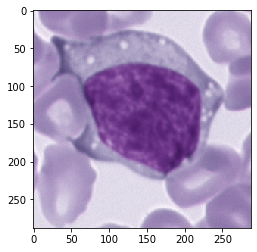

In [163]:
bright = BrightnessNormalisation()
blur = FixBlur(threshold=150, sharpness=50.0)

show(image)

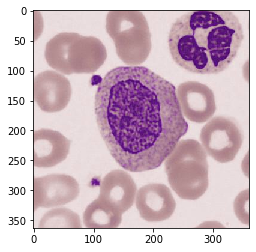

In [93]:
#hue = transforms.ColorJitter(saturation=0.8)
hue = transforms.ColorJitter(hue=.08)

show(hue(image))

In [208]:
image = imread(metadata[metadata.Image == '225.TIF'].file.iloc[0])[:,:,[0,1,2]]

In [209]:
image = image / 255

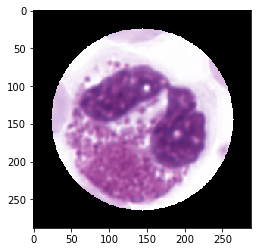

In [214]:
h, w = image.shape[:2]
#mask = create_circular_mask(h, w, radius = 120)
mask = create_circular_mask(h, w, radius = 120)
masked_img = image.copy()
masked_img[~mask] = 0
#masked_img = masked_img / 255
masked_img = np.transpose(masked_img, (2, 0, 1))
masked_img = torch.from_numpy(copy.deepcopy(masked_img)) 
masked_img = masked_img.float()

show(masked_img)

In [187]:
# class Mask(torch.nn.Module):
#     def __init__(self, radius=120):
#         super().__init__()
#         self.p = p
#         self.kernel = kernel_size
#         self.sigma = sigma

#     def forward(self, img):


In [92]:
normalization = torchvision.transforms.Normalize(mean,std)

#todo: add mix-up stain

class RandomGaussianBlur(torch.nn.Module):
    def __init__(self, p=0.35, kernel_size=7, sigma=(1,10)):
        super().__init__()
        self.p = p
        self.kernel = kernel_size
        self.sigma = sigma

    def forward(self, img):
        """
        Args:
            img (PIL Image or Tensor): Image to be blurred.

        Returns:
            PIL Image or Tensor: Randomly blurred image.
        """
        if torch.rand(1) < self.p:
            sigma = np.random.uniform(self.sigma[0], self.sigma[1], size=1)[0]
            return F.gaussian_blur(img, kernel_size=self.kernel, sigma=sigma)
        return img

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(p={self.p})"
    
#target_image = mpimg.imread(metadata[metadata.Image == '971.TIF'].file.iloc[0])[:, :, [0, 1, 2]]
#target_stain_matrix = get_stain_matrix(target_image)

class MyRandomRotation(torch.nn.Module):
    def __init__(self, p=0.5, degrees=[10, 30, 45, 60, 90, 120, 160], fill=1):
        super().__init__()
        self.p = p
        self.degrees = degrees
        self.fill = fill
    
    def forward(self, img):
        if torch.rand(1) < self.p:
            angle = random.choice(self.degrees)
            return F.rotate(img, angle, fill=self.fill)
        return img
        
class FixBlur(torch.nn.Module):
    def __init__(self, threshold=100, sharpness=7.0):
        super().__init__()
        self.mult_fct = 255 ** 2
        self.threshold = threshold
        self.sharpness = sharpness
    
    def forward(self, img):
        focus = -np.inf
        if self.threshold > 0.0:
            current_image = np.transpose(img.numpy(), (1, 2, 0))
            focus = cv2.Laplacian(current_image, cv2.CV_32F).var() * self.mult_fct

        if focus <= self.threshold:
            F.adjust_sharpness(img, self.sharpness)
        return img

class GaussianNoise(nn.Module): # add some noise in the data
    """Gaussian noise regularizer.

    Args:
        sigma (float, optional): relative standard deviation used to generate the
            noise. Relative means that it will be multiplied by the magnitude of
            the value your are adding the noise to. This means that sigma can be
            the same regardless of the scale of the vector.
        is_relative_detach (bool, optional): whether to detach the variable before
            computing the scale of the noise. If `False` then the scale of the noise
            won't be seen as a constant but something to optimize: this will bias the
            network to generate vectors with smaller values.
    """
    def __init__(self, sigma=0.001, is_relative_detach=True):
        super().__init__()
        self.sigma = sigma
        self.is_relative_detach = is_relative_detach
        self.register_buffer('noise', torch.tensor(0))

    def forward(self, x):
        if self.training and self.sigma != 0:
            scale = self.sigma * x.detach() if self.is_relative_detach else self.sigma * x
            sampled_noise = self.noise.expand(*x.size()).float().normal_() * scale
            x = x + sampled_noise
        return x 
    
class RandomGaussianNoise(nn.Module): # add some noise in the data
    """Gaussian noise regularizer.

    Args:
        sigma (float, optional): relative standard deviation used to generate the
            noise. Relative means that it will be multiplied by the magnitude of
            the value your are adding the noise to. This means that sigma can be
            the same regardless of the scale of the vector.
        is_relative_detach (bool, optional): whether to detach the variable before
            computing the scale of the noise. If `False` then the scale of the noise
            won't be seen as a constant but something to optimize: this will bias the
            network to generate vectors with smaller values.
    """
    def __init__(self, p=0.5, sigma=[0.00001, 0.000001], is_relative_detach=True):
        super().__init__()
        self.sigma = sigma
        self.is_relative_detach = is_relative_detach
        self.register_buffer('noise', torch.tensor(0))
        self.p = p

    def forward(self, x):
        if self.training and self.sigma != 0:
            if torch.rand(1) < self.p:
                sigma = np.random.uniform(self.sigma[0], self.sigma[1], size=1)[0]
                scale = sigma * x.detach() if self.is_relative_detach else sigma * x
                sampled_noise = self.noise.expand(*x.size()).float().normal_() * scale
                x = x + sampled_noise
            return x

# class FixBlur(torch.nn.Module):
#     def __init__(self, threshold=150, max_sharpness=10.0):
#         super().__init__()
#         self.mult_fct = 255 ** 2
#         self.threshold = threshold
#         self.max_sharpness = max_sharpness
    
#     def forward(self, img):
#         sharpness = 0
#         if self.threshold > 0.0:
#             current_image = np.transpose(img.numpy(), (1, 2, 0))
#             focus = cv2.Laplacian(current_image, cv2.CV_32F).var() * self.mult_fct
            
#             if focus < self.threshold:
#                 slope = (1 - self.max_sharpness) / self.threshold
#                 sharpness = self.max_sharpness + slope * focus
#         else:
#             sharpness = self.max_sharpness
        
#         if sharpness > 0.0:
#             return F.adjust_sharpness(img, sharpness)
#         return img

train_transform = transforms.Compose([
        #MixUpStaining(target_stain_mtx=target_stain_matrix, alpha=0.9),
        #GaussianNoise(sigma=0.01),
        BrightnessNormalisation(),
        #RandomGaussianBlur(p=0.2), # to intentionally blur image
        FixBlur(threshold=100, sharpness=10.0),
        #RandomGaussianNoise(),
        MyRandomRotation(p=0.6),
        #normalization,
        transforms.ColorJitter(hue=.08),
        transforms.ColorJitter(saturation=0.7),
        #transforms.AugMix(),
        transforms.RandomResizedCrop(resize, scale=random_crop_scale, ratio=random_crop_ratio),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip()
])

train_def_transform = transforms.Compose([
        #MixUpStaining(target_stain_mtx=target_stain_matrix, alpha=0.9),
        BrightnessNormalisation(),
        FixBlur(threshold=100, sharpness=10.0),
        #normalization,
        transforms.Resize(resize)
])

val_transform = transforms.Compose([ 
        #MixUpStaining(target_stain_mtx=target_stain_matrix, alpha=0.9),
        BrightnessNormalisation(),
        FixBlur(threshold=100, sharpness=10.0),
        #normalization,
        transforms.Resize(resize)])

test_transform = transforms.Compose([ 
        #MixUpStaining(target_stain_mtx=target_stain_matrix, alpha=0.9),
        BrightnessNormalisation(),
        FixBlur(threshold=100, sharpness=10.0),
        #normalization,
        #transforms.RandomAdjustSharpness(2, p=1),
        transforms.Resize(resize)])

#dataset-creation

train_dataset = DatasetGenerator(example_metadata.loc[train_index,:], 
                                 reshape_size=resize, 
                                 dataset = source_domains,
                                 label_map=label_map_all, 
                                 def_transform=train_def_transform,
                                 transform = train_transform,
                                 duplicate = 12
                                 )
val_dataset = DatasetGenerator(example_metadata.loc[val_index,:], 
                                 reshape_size=resize, 
                                 dataset = source_domains,
                                 label_map=label_map_all, 
                                 transform = val_transform,
                                 )

test_dataset = DatasetGenerator(example_metadata.loc[test_index,:], 
                                 reshape_size=resize, 
                                 dataset = source_domains,
                                 label_map=label_map_all, 
                                 transform = test_transform,
                                 )
wbc_dataset = DatasetGenerator(wbc_metadata,
                                reshape_size=resize, 
                                dataset = source_domains,
                                label_map=label_map_all, 
                                transform = test_transform,
                                known_labels = False,
                                )

wbc1_dataset = DatasetGenerator(wbc1_metadata,
                                reshape_size=resize, 
                                dataset = source_domains,
                                label_map=label_map_all, 
                                transform = test_transform,
                                known_labels = False,
                                )

train_loader = DataLoader(
    train_dataset, batch_size=bs, shuffle=True, num_workers=number_workers)
valid_loader = DataLoader(
    val_dataset, batch_size=bs, shuffle=True, num_workers=number_workers)
test_loader = DataLoader(
    test_dataset, batch_size=bs, shuffle=False, num_workers=number_workers)
wbc_loader = DataLoader(
    wbc_dataset, batch_size=bs, shuffle=False, num_workers=number_workers)
wbc_loader = DataLoader(
    wbc1_dataset, batch_size=bs, shuffle=False, num_workers=number_workers)

In [73]:
# target_image = mpimg.imread(metadata[metadata.Image == '971.TIF'].file.iloc[0])[:, :, [0, 1, 2]]
# source_image = mpimg.imread(metadata[metadata.Image == 'PMY_991745.jpg'].file.iloc[0])[:, :, [0, 1, 2]]
# target_stain_matrix = get_stain_matrix(target_image)
# source_stain_matrix = get_stain_matrix(source_image)

In [74]:
# augmented_image = stain_mixup(source_image, source_stain_matrix, target_stain_matrix, alpha=0.9)
# f, axarr = plt.subplots(3, figsize=(10,10))
# axarr[0].set_title('Source')
# axarr[0].imshow(source_image)
# axarr[1].set_title('Target')
# axarr[1].imshow(target_image)
# axarr[2].set_title('Aug_Source')
# axarr[2].imshow(augmented_image)

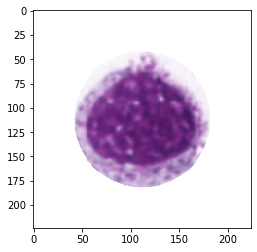

In [74]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
    
#show((next(iter(train_loader))[0])[0])
# show(wbc_dataset[7][0])
# wbc_dataset[7][1]
show(wbc_dataset[255][0])

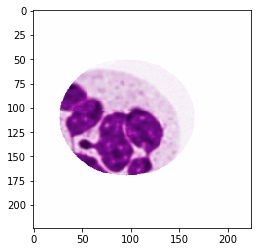

In [161]:
show(train_dataset[3016][0])

In [49]:
example_metadata

,Image,file,label,dataset,set,mean1,mean2,mean3,old_file
0,BA_100102.jpg,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,basophil,Ace_20,val,224.147949,192.992011,181.520684,Datasets/Acevedo_20/basophil/BA_100102.jpg
1,BA_101381.jpg,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,basophil,Ace_20,train,216.880395,185.347467,180.204591,Datasets/Acevedo_20/basophil/BA_101381.jpg
2,BA_101611.jpg,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,basophil,Ace_20,train,218.369314,182.833150,181.483938,Datasets/Acevedo_20/basophil/BA_101611.jpg
3,BA_102039.jpg,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,basophil,Ace_20,train,212.396771,178.227456,180.590029,Datasets/Acevedo_20/basophil/BA_102039.jpg
4,BA_102750.jpg,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,basophil,Ace_20,train,226.372008,194.938170,184.035889,Datasets/Acevedo_20/basophil/BA_102750.jpg
...,...,...,...,...,...,...,...,...,...
32607,PMO_0066.tiff,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,promyelocyte,Mat_19,train,214.181038,179.721381,222.508881,Datasets/Matek_19/promyelocyte/PMO_0066.tiff
32608,PMO_0067.tiff,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,promyelocyte,Mat_19,train,165.461906,121.628325,193.200038,Datasets/Matek_19/promyelocyte/PMO_0067.tiff
32609,PMO_0068.tiff,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,promyelocyte,Mat_19,test,209.163387,177.865588,213.705719,Datasets/Matek_19/promyelocyte/PMO_0068.tiff
32610,PMO_0069.tiff,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,promyelocyte,Mat_19,train,197.306762,170.695331,212.139050,Datasets/Matek_19/promyelocyte/PMO_0069.tiff


In [50]:
## TRAINING

In [78]:
epochs=15 # max number of epochs
lr=0.001 # learning rate
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [67]:
### to load model
#model = resnet18(torch.load('model1', map_location=torch.device('cpu')))

In [79]:
mat_distr = np.bincount(metadata.loc[metadata['dataset']=='Mat_19'].label \
                        .map(label_map_all)).astype(float)
mat_distr /= np.sum(mat_distr)

In [69]:
## Calculate weights based on the biological distributions of cells from Matek dataset
class_counts = np.bincount(mat_metadata.label.map(label_map_all)).astype(float)
class_weights = np.sum(class_counts) / class_counts
class_weights /= np.sum(class_weights)
class_weights = np.power(class_weights, 0.3)
class_weights /= np.sum(class_weights)
class_weights * 10

array([1.15195937, 0.69584984, 1.15637024, 0.37708623, 1.19452674,
       1.39235667, 1.89626011, 1.04591728, 0.28323381, 0.44984438,
       0.35659534])

In [80]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)

In [81]:
### Loading a resnet18 model
num_classes = len(label_map_all)
# model = resnet18(pretrained=True) # remove this if the model was already instansiated in the cell above

params = torch.load('resnet18-f37072fd.pth')

#params = torch.load('resnet50-0676ba61.pth')
#model = resnet50(params)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)
model = nn.DataParallel(model) 
model.to(device)
criterion = nn.CrossEntropyLoss()

#class_weights = torch.from_numpy(class_weights).float().to(device) # if change weights
#criterion = nn.CrossEntropyLoss(weight=class_weights) # if change weights

optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

In [82]:
from scipy.stats import entropy

In [83]:
model_save_path='model' #path where model with best f1_macro should be stored
model_save_path_lowest_entropy='model_entr' #path where model with the lowest entropy should be stored
model_save_path_low_entr_zero='model_entr_w0'

#running variables
epoch=0
update_frequency=5 # number of batches before viewed acc and loss get updated
counter=0 #counts batches
f1_macro_best=0 #minimum f1_macro_score of the validation set for the first model to be saved
lowest_entropy=np.inf
loss_running=0
acc_running=0
val_batches=0

y_pred=torch.tensor([], dtype=int)
y_true=torch.tensor([], dtype=int)
y_pred=y_pred.to(device)
y_true=y_true.to(device)

#Training

for epoch in range(0, epochs):
    #training
    model.train()
    
    with tqdm(train_loader) as tepoch:   
        for i, data in enumerate(tepoch):
            tepoch.set_description(f"Epoch {epoch+1}")
            counter+=1

            x, y = data
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            out = model(x)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

            logits = torch.softmax(out.detach(), dim=1)
            predictions = logits.argmax(dim=1)
            acc = accuracy_score(y.cpu(), predictions.cpu())
            
            if counter >= update_frequency:
                tepoch.set_postfix(loss=loss.item(), accuracy=acc.item())
                counter=0
                
    #validation       
    model.eval()
    with tqdm(valid_loader) as vepoch: 
        for i, data in enumerate(vepoch):
            vepoch.set_description(f"Validation {epoch+1}")

            x, y = data
            x, y = x.to(device), y.to(device)

            out = model(x)
            loss = criterion(out, y)
            
            logits = torch.softmax(out.detach(), dim=1)
            predictions = logits.argmax(dim=1)
            y_pred=torch.cat((y_pred, predictions), 0)
            y_true=torch.cat((y_true, y), 0)
            
            acc = accuracy_score(y_true.cpu(), y_pred.cpu())
            
            loss_running+=(loss.item()*len(y))
            acc_running+=(acc.item()*len(y))
            val_batches+=len(y)
            loss_mean=loss_running/val_batches
            acc_mean=acc_running/val_batches
            
            vepoch.set_postfix(loss=loss_mean, accuracy=acc_mean)
            
        f1_micro=f1_score(y_true.cpu(), y_pred.cpu(), average='micro')
        f1_macro=f1_score(y_true.cpu(), y_pred.cpu(), average='macro')
        print(f'f1_micro: {f1_micro}, f1_macro: {f1_macro}')  
        if f1_macro > f1_macro_best:
            f1_macro_best=f1_macro
            torch.save(model.state_dict(), model_save_path)
            print('model saved')
        
        #reseting running variables
        loss_running=0
        acc_running=0
        val_batches=0
            
        y_pred=torch.tensor([], dtype=int)
        y_true=torch.tensor([], dtype=int)
        y_pred=y_pred.to(device)
        y_true=y_true.to(device)
    
    wbc_distr = np.zeros(len(label_list_all))
    for x, _ in tqdm(wbc_loader):
        x = x.to(device)
        out = model(x)
        logits = torch.softmax(out.detach(), dim=1)
        predic = logits.argmax(dim=1)
        for y in predic.cpu().numpy():
            wbc_distr[y] += 1

    wbc_entropy = entropy(wbc_distr / np.sum(wbc_distr), qk=mat_distr)
    sys.stderr.write('   WBC distr: {}    entropy: {:.5f}\n'.format(wbc_distr.astype(int), wbc_entropy))
    
    if wbc_entropy < lowest_entropy and min(wbc_distr) > 0:
        torch.save(model.state_dict(), model_save_path_lowest_entropy)
        lowest_entropy = wbc_entropy
        print('model with the lowest entropy saved')
    elif wbc_entropy < lowest_entropy and min(wbc_distr) == 0:
        torch.save(model.state_dict(), model_save_path_low_entr_zero)
        lowest_entropy = wbc_entropy
        print('model with the lowest entropy saved but with zero(s)')
        
print('Finished Training')

#loading the model with the highest validation accuracy
model.load_state_dict(torch.load('model'))
print(model)

Validation 1: 100%|██████████| 102/102 [00:09<00:00, 10.53it/s, accuracy=0.62, loss=1.08]


f1_micro: 0.6336603310852238, f1_macro: 0.6513641187122
model saved


100%|██████████| 50/50 [00:04<00:00, 11.43it/s]
   WBC distr: [123 115 258  93  25  47  52 274  80 189 330]    entropy: 1.53891


model with the lowest entropy saved


Validation 2: 100%|██████████| 102/102 [00:03<00:00, 27.13it/s, accuracy=0.913, loss=0.262]


f1_micro: 0.9107909258123851, f1_macro: 0.869724535849716
model saved


100%|██████████| 50/50 [00:02<00:00, 23.63it/s]
   WBC distr: [ 68 131  84 275  18  29  11  15 309 197 449]    entropy: 0.33917


model with the lowest entropy saved


Validation 3: 100%|██████████| 102/102 [00:04<00:00, 22.71it/s, accuracy=0.908, loss=0.252]


f1_micro: 0.9156958920907419, f1_macro: 0.8735647835639292
model saved


100%|██████████| 50/50 [00:02<00:00, 24.05it/s]
   WBC distr: [ 52  86  78 398  20  23   8  32 280 171 438]    entropy: 0.30247


model with the lowest entropy saved


Validation 4: 100%|██████████| 102/102 [00:03<00:00, 27.10it/s, accuracy=0.926, loss=0.233]


f1_micro: 0.9261189454322502, f1_macro: 0.8837325723312767
model saved


100%|██████████| 50/50 [00:02<00:00, 23.46it/s]
   WBC distr: [ 69 134  77 260  19  34  29  15 346 160 443]    entropy: 0.34797
Validation 5: 100%|██████████| 102/102 [00:04<00:00, 25.36it/s, accuracy=0.908, loss=0.282]


f1_micro: 0.9114040465971797, f1_macro: 0.8551390456556279


100%|██████████| 50/50 [00:02<00:00, 23.25it/s]
   WBC distr: [ 95 148 103 313  13  18  46  18 323 156 353]    entropy: 0.45967
Validation 6: 100%|██████████| 102/102 [00:03<00:00, 26.47it/s, accuracy=0.926, loss=0.258]


f1_micro: 0.9221336603310852, f1_macro: 0.8855194280462038
model saved


100%|██████████| 50/50 [00:02<00:00, 21.74it/s]
   WBC distr: [101  58 108 292  10  17  21  19 305 244 411]    entropy: 0.39498
Validation 7: 100%|██████████| 102/102 [00:03<00:00, 27.90it/s, accuracy=0.917, loss=0.267]


f1_micro: 0.9160024524831392, f1_macro: 0.8695969454526538


100%|██████████| 50/50 [00:01<00:00, 25.35it/s]
   WBC distr: [122 112  93 388  15  17  13  16 281 121 408]    entropy: 0.43695
Validation 8: 100%|██████████| 102/102 [00:03<00:00, 27.45it/s, accuracy=0.915, loss=0.274]


f1_micro: 0.9206008583690987, f1_macro: 0.8786565108652085


100%|██████████| 50/50 [00:02<00:00, 22.28it/s]
   WBC distr: [ 42 109 103 290  13  24  27  41 353 220 364]    entropy: 0.32755
Validation 9: 100%|██████████| 102/102 [00:03<00:00, 25.89it/s, accuracy=0.914, loss=0.306]


f1_micro: 0.9101778050275904, f1_macro: 0.8761469251316637


100%|██████████| 50/50 [00:02<00:00, 21.72it/s]
   WBC distr: [ 67 122 113 366  16  20  32  41 296 153 360]    entropy: 0.42317
Validation 10: 100%|██████████| 102/102 [00:03<00:00, 27.30it/s, accuracy=0.905, loss=0.318]


f1_micro: 0.907725321888412, f1_macro: 0.8622235470235153


100%|██████████| 50/50 [00:02<00:00, 24.95it/s]
   WBC distr: [119  79 153 271  16  42  29  66 318 170 323]    entropy: 0.58821
Validation 11: 100%|██████████| 102/102 [00:03<00:00, 26.38it/s, accuracy=0.924, loss=0.268]


f1_micro: 0.9175352544451257, f1_macro: 0.8701400793577466


100%|██████████| 50/50 [00:02<00:00, 23.41it/s]
   WBC distr: [110  62  89 281  26  22  39  47 358 174 378]    entropy: 0.41044
Validation 12: 100%|██████████| 102/102 [00:03<00:00, 26.94it/s, accuracy=0.926, loss=0.27]


f1_micro: 0.9258123850398529, f1_macro: 0.8782253121530093


100%|██████████| 50/50 [00:02<00:00, 23.56it/s]
   WBC distr: [ 99  69  90 378  37  19  33  36 340 148 337]    entropy: 0.39697
Validation 13: 100%|██████████| 102/102 [00:03<00:00, 26.41it/s, accuracy=0.93, loss=0.28] 


f1_micro: 0.9181483752299203, f1_macro: 0.8745768997631433


100%|██████████| 50/50 [00:02<00:00, 24.18it/s]
   WBC distr: [ 79  57  76 329  13  16  39  19 380 165 413]    entropy: 0.29551


model with the lowest entropy saved


Validation 14: 100%|██████████| 102/102 [00:04<00:00, 25.46it/s, accuracy=0.92, loss=0.293]


f1_micro: 0.9138565297363581, f1_macro: 0.8660217389638536


100%|██████████| 50/50 [00:02<00:00, 23.53it/s]
   WBC distr: [ 71  71 155 333  13  45  36  36 343  96 387]    entropy: 0.49474
Validation 15: 100%|██████████| 102/102 [00:03<00:00, 26.77it/s, accuracy=0.922, loss=0.265]


f1_micro: 0.9218270999386879, f1_macro: 0.8715688822940713


100%|██████████| 50/50 [00:02<00:00, 23.01it/s]
   WBC distr: [ 60  83 105 297  18  11  22  13 386 155 436]    entropy: 0.28737


model with the lowest entropy saved
Finished Training
DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Batch

In [55]:
### Evaluation

In [289]:
# params = torch.load('resnet50-0676ba61.pth').to(device)
# model = resnet50(params)

In [107]:
# model.load_state_dict(torch.load('model31', map_location=device))

<All keys matched successfully>

In [98]:
# model.load_state_dict(torch.load('model_entr', map_location=device))

<All keys matched successfully>

In [108]:
metadata_test=example_metadata.loc[test_index,:]
ace_metadata_test=metadata_test.loc[metadata_test['dataset']=='Ace_20'].reset_index(drop = True)
mat_metadata_test=metadata_test.loc[metadata_test['dataset']=='Mat_19'].reset_index(drop = True)

In [100]:
def prediction(metadata=metadata_test, 
               source_domains=['Ace_20', 'Mat_19'], label_map=label_map_all):

    pred_dataset = DatasetGenerator(metadata, 
                                 reshape_size=resize, 
                                 dataset = source_domains,
                                 label_map=label_map, 
                                 transform = test_transform,
                                 )
    
    pred_loader = DataLoader(pred_dataset, 
                             batch_size=1, 
                             shuffle=False, 
                             num_workers=6
                            )
    n=len(pred_loader)
    model.eval()
    preds=torch.tensor([], dtype=int)
    preds=preds.to(device)
    prediction=torch.tensor([])
    prediction=prediction.to(device)
    for i, data in enumerate(tqdm(pred_loader)):
        # get the inputs; data is a list of [inputs, labels]
        x, y = data
        x, y = x.to(device), y.to(device)
        out = model(x)
        logits = torch.softmax(out.detach(), dim=1)
        prediction = torch.cat((prediction, logits), 0)
        predic = logits.argmax(dim=1)
        preds=torch.cat((preds, predic), 0)

    preds=preds.cpu()
    preds=preds.detach().numpy()
    np.save('preds', preds)
    y_pred = [label_map_reverse[p] for p in  preds]
    y_true=metadata['label']
    return y_true, y_pred, preds

def classification_complete_report(y_true, y_pred ,labels = None  ): 
    print(classification_report(y_true, y_pred, labels = None, digits = 4))
    print(15*"----")
    print("matthews correlation coeff: %.4f" % (matthews_corrcoef(y_true, y_pred)) )
    print("Cohen Kappa score: %.4f" % (cohen_kappa_score(y_true, y_pred)) )
    print("Accuracy: %.4f & balanced Accuracy: %.4f" % (accuracy_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred)) )
    #print("macro F1 score: %.4f & micro F1 score: %.4f" % (f1_score(y_true, y_pred, average = "macro"), f1_score(y_true, y_pred, average = "micro")) )
    print("macro Precision score: %.4f & micro Precision score: %.4f" % (precision_score(y_true, y_pred, average = "macro"), precision_score(y_true, y_pred, average = "micro")) )
    print("macro Recall score: %.4f & micro Recall score: %.4f" % (recall_score(y_true, y_pred, average = "macro"), recall_score(y_true, y_pred, average = "micro")) )
    print(labels)
    cm = confusion_matrix(y_true, y_pred,labels= labels, normalize='true')
    fig, ax = plt.subplots(figsize=(10, 10)) #plot size
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax, include_values=False, colorbar=False)
    
    plt.show()
    print(15*"----")

In [302]:
## Acevedo

100%|██████████| 2812/2812 [00:20<00:00, 135.80it/s]


                      precision    recall  f1-score   support

            basophil     0.9827    0.9870    0.9848       230
          eosinophil     0.9984    0.9951    0.9967       610
        erythroblast     0.9900    0.9966    0.9933       298
  lymphocyte_typical     0.9710    1.0000    0.9853       201
       metamyelocyte     0.8220    0.7734    0.7970       203
            monocyte     0.9761    0.9316    0.9533       263
           myelocyte     0.7717    0.8596    0.8133       228
   neutrophil_banded     0.7841    0.8625    0.8214       320
neutrophil_segmented     0.8824    0.8382    0.8597       340
        promyelocyte     0.8947    0.7143    0.7944       119

            accuracy                         0.9161      2812
           macro avg     0.9073    0.8958    0.8999      2812
        weighted avg     0.9182    0.9161    0.9161      2812

------------------------------------------------------------
matthews correlation coeff: 0.9048
Cohen Kappa score: 0.9046
Accurac

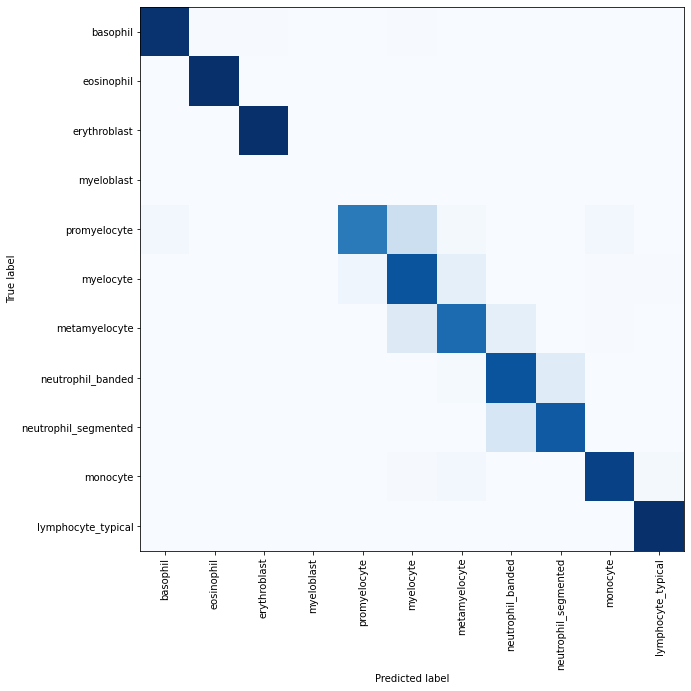

------------------------------------------------------------


In [109]:
y_true, y_pred, preds=prediction(metadata= ace_metadata_test, source_domains=['Ace_20'])
classification_complete_report(y_true, y_pred, labels=label_list_all)

In [441]:
## Matek

100%|██████████| 3711/3711 [00:26<00:00, 141.39it/s]


                      precision    recall  f1-score   support

            basophil     0.7500    0.4737    0.5806        19
          eosinophil     0.8864    0.8864    0.8864        88
        erythroblast     0.6957    0.8889    0.7805        18
  lymphocyte_typical     0.9550    0.9597    0.9574       819
       metamyelocyte     0.6667    0.6667    0.6667         3
            monocyte     0.8608    0.8102    0.8347       374
          myeloblast     0.8916    0.9434    0.9168       654
           myelocyte     0.5000    0.2500    0.3333         8
   neutrophil_banded     0.5000    0.2069    0.2927        29
neutrophil_segmented     0.9764    0.9816    0.9790      1686
        promyelocyte     0.4286    0.2308    0.3000        13

            accuracy                         0.9369      3711
           macro avg     0.7374    0.6635    0.6844      3711
        weighted avg     0.9335    0.9369    0.9341      3711

------------------------------------------------------------
matthe

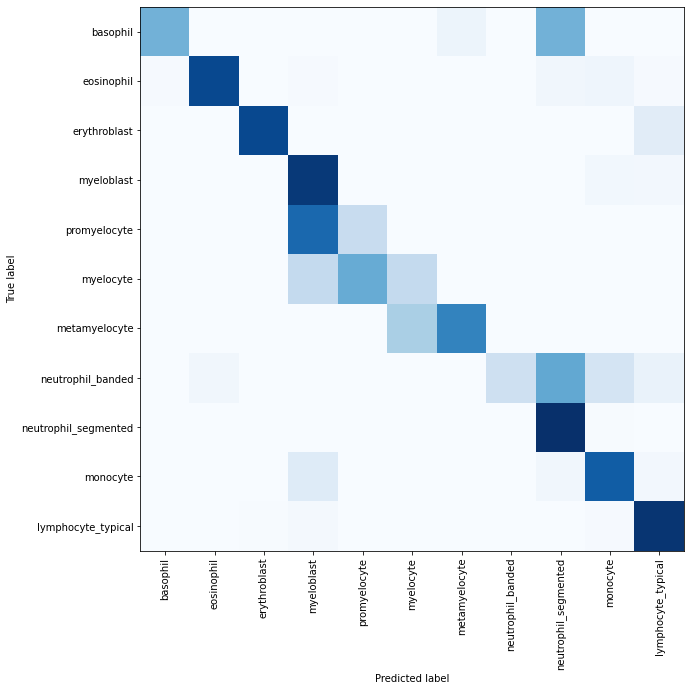

------------------------------------------------------------


In [110]:
y_true, y_pred, preds=prediction(metadata= mat_metadata_test, source_domains=['Mat_19'])
classification_complete_report(y_true, y_pred, labels=label_list_all)

In [79]:
## WBC

In [89]:
wbc1_metadata=metadata.loc[metadata['dataset']=='WBC1'].reset_index(drop = True)
label_map_pred1 = {
        'DATA-VAL': 0
    }

In [91]:
wbc1_metadata

,Image,file,label,dataset,set,mean1,mean2,mean3,old_file
0,0.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,217.419078,198.016577,223.372902,Datasets/WBC1/DATA-VAL/0.TIF
1,1.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,216.167752,187.477057,217.791377,Datasets/WBC1/DATA-VAL/1.TIF
2,10.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,170.063814,151.944686,180.775788,Datasets/WBC1/DATA-VAL/10.TIF
3,100.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,205.686861,193.020098,214.727840,Datasets/WBC1/DATA-VAL/100.TIF
4,1000.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,197.280503,168.995841,201.571386,Datasets/WBC1/DATA-VAL/1000.TIF
...,...,...,...,...,...,...,...,...,...
1586,995.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,158.898088,140.900053,180.112944,Datasets/WBC1/DATA-VAL/995.TIF
1587,996.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,144.568094,113.955319,166.413966,Datasets/WBC1/DATA-VAL/996.TIF
1588,997.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,170.265685,145.219063,188.039786,Datasets/WBC1/DATA-VAL/997.TIF
1589,998.TIF,/p/project/hai_ds_isa/lipaeva1/mixup_datasets/...,DATA-VAL,WBC1,train,180.459660,147.819746,188.145870,Datasets/WBC1/DATA-VAL/998.TIF


In [93]:
y_true, y_pred, preds=prediction(metadata=wbc1_metadata, source_domains=['WBC1'], label_map=label_map_pred1)

  0%|          | 0/1591 [00:00<?, ?it/s]


KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/p/software/juwelsbooster/stages/2022/software/PyTorch/1.11-gcccoremkl-11.2.0-2021.4.0-CUDA-11.5/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/p/software/juwelsbooster/stages/2022/software/PyTorch/1.11-gcccoremkl-11.2.0-2021.4.0-CUDA-11.5/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/p/software/juwelsbooster/stages/2022/software/PyTorch/1.11-gcccoremkl-11.2.0-2021.4.0-CUDA-11.5/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_7113/3220839711.py", line 37, in __getitem__
    crop_size = dataset_image_size[dataset]
KeyError: 'WBC1'


In [ ]:
#wbc_metadata=metadata.loc[metadata['dataset']=='WBC2'].reset_index(drop = True)
label_map_pred = {
        'DATA-TEST': 0
    }

In [111]:
y_true, y_pred, preds=prediction(metadata=wbc_metadata, source_domains=['WBC2'], label_map=label_map_pred)

100%|██████████| 1586/1586 [00:11<00:00, 136.96it/s]


In [112]:
outputdata=wbc_metadata.drop(columns=['file', 'label', 'dataset', 'set', 'mean1', 'mean2', 'mean3'])
outputdata['Label']=y_pred
outputdata['LabelID']=preds
'''
for i in range(len(y_pred)):
    outputdata['LabelID'].loc[i]=y_pred[i]
    outputdata['Label'].loc[i]=label_map_reverse[y_pred[i]]
'''
#outputdata.to_csv('submission_phase2_2_entr.csv')
print(outputdata)

         Image                          old_file                 Label  \
0        0.TIF     Datasets/WBC2/DATA-TEST/0.TIF     neutrophil_banded   
1        1.TIF     Datasets/WBC2/DATA-TEST/1.TIF            myeloblast   
2       10.TIF    Datasets/WBC2/DATA-TEST/10.TIF              monocyte   
3      100.TIF   Datasets/WBC2/DATA-TEST/100.TIF    lymphocyte_typical   
4     1000.TIF  Datasets/WBC2/DATA-TEST/1000.TIF              monocyte   
...        ...                               ...                   ...   
1581   994.TIF   Datasets/WBC2/DATA-TEST/994.TIF  neutrophil_segmented   
1582   995.TIF   Datasets/WBC2/DATA-TEST/995.TIF    lymphocyte_typical   
1583   996.TIF   Datasets/WBC2/DATA-TEST/996.TIF  neutrophil_segmented   
1584   997.TIF   Datasets/WBC2/DATA-TEST/997.TIF  neutrophil_segmented   
1585   999.TIF   Datasets/WBC2/DATA-TEST/999.TIF              monocyte   

      LabelID  
0           7  
1           3  
2           9  
3          10  
4           9  
...       ...  

In [113]:
outputdata.Label.value_counts()

lymphocyte_typical      402
myeloblast              336
neutrophil_segmented    316
monocyte                163
eosinophil              123
erythroblast            109
basophil                 38
neutrophil_banded        33
metamyelocyte            30
myelocyte                19
promyelocyte             17
Name: Label, dtype: int64

In [114]:
wbc_distr = np.bincount(outputdata.Label \
                        .map(label_map_all)).astype(float)
#wbc_distr /= np.sum(wbc_distr)
wbc_entropy = entropy(wbc_distr / np.sum(wbc_distr), qk=mat_distr)
print('   WBC distr: {}    entropy: {:.5f}\n'.format(wbc_distr.astype(int), wbc_entropy))

   WBC distr: [ 38 123 109 336  17  19  30  33 316 163 402]    entropy: 0.35638



In [27]:
wbc_metadata

,Image,file,label,dataset,set,mean1,mean2,mean3
0,0.TIF,Datasets/WBC2/DATA-TEST/0.TIF,DATA-TEST,WBC2,train,207.959274,194.051131,215.675359
1,1.TIF,Datasets/WBC2/DATA-TEST/1.TIF,DATA-TEST,WBC2,train,155.974646,126.191961,176.428723
2,10.TIF,Datasets/WBC2/DATA-TEST/10.TIF,DATA-TEST,WBC2,train,184.374325,157.223030,197.586950
3,100.TIF,Datasets/WBC2/DATA-TEST/100.TIF,DATA-TEST,WBC2,train,187.343991,165.106108,203.092544
4,1000.TIF,Datasets/WBC2/DATA-TEST/1000.TIF,DATA-TEST,WBC2,train,179.960913,165.651186,198.972753
...,...,...,...,...,...,...,...,...
1581,994.TIF,Datasets/WBC2/DATA-TEST/994.TIF,DATA-TEST,WBC2,train,207.090977,187.650680,215.303711
1582,995.TIF,Datasets/WBC2/DATA-TEST/995.TIF,DATA-TEST,WBC2,train,200.330235,184.199158,207.699834
1583,996.TIF,Datasets/WBC2/DATA-TEST/996.TIF,DATA-TEST,WBC2,train,184.456284,157.996033,190.267590
1584,997.TIF,Datasets/WBC2/DATA-TEST/997.TIF,DATA-TEST,WBC2,train,189.697121,169.530937,199.857494


In [ ]:
# Below is a preprocessing of all images with "Stain mix-up augmentation" strategy (stain_mixup library)

In [14]:
target_image = mpimg.imread(metadata[metadata.Image == '971.TIF'].file.iloc[0])[:, :, [0, 1, 2]]
target_stain_matrix = get_stain_matrix(target_image)

In [17]:
out_path = '/p/project/hai_ds_isa/lipaeva1/mixup_datasets/'

In [18]:
import multiprocessing

In [29]:
def process_image(filename, curr_ds = ''):
    out_filename = os.path.join(out_path, filename.replace('Datasets/', ''))
    #ds = filename.split('/')[1]
    # if ds != curr_ds:
    #     #print(ds)
    #     curr_ds = ds
    if os.path.exists(out_filename):
        return
    #print('new file')
    if out_filename.endswith('.TIF'):
        out_filename = out_filename.rsplit('.', 1)[0] + '.tiff'
    source_image = mpimg.imread(filename)[:, :, [0, 1, 2]]
    source_stain_matrix = get_stain_matrix(source_image)
    augmented_image = stain_mixup(source_image, source_stain_matrix, target_stain_matrix, alpha=0.9)
    mpimg.imsave(out_filename, augmented_image)

In [ ]:
pool = multiprocessing.Pool(4)
pool.map(process_image, wbc_metadata.file)
pool.join()